In [159]:
import matplotlib.pylab as plt
import numpy as np
from PIL import Image
import tensorflow as tf
import tensorflow_hub as hub

In [161]:
style_transfer_model = hub.load("https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2")

In [147]:
content_image = tf.io.decode_image(tf.io.read_file("../images/640px-Golden_Gate_Bridge_from_Battery_Spencer.jpeg"),
                                  channels=3,
                                  dtype=tf.float32)[tf.newaxis, ...]

In [148]:
# content_image = tf.image.resize(content_image, (480, 480), preserve_aspect_ratio=True)

In [149]:
content_image.shape

TensorShape([1, 480, 640, 3])

In [162]:
style_image = tf.io.decode_image(tf.io.read_file("../images/Van_Gogh_-_Starry_Night_-_Google_Art_Project.jpeg"),
                                 channels=3,
                                 dtype=tf.float32)[tf.newaxis, ...]
                                

In [163]:
style_image = tf.image.resize(style_image, (256, 256))#, preserve_aspect_ratio=True)


In [164]:
style_image.shape


TensorShape([1, 256, 256, 3])

In [165]:
output = style_transfer_model(content_image, style_image)


In [166]:
stylized_image = output[0]


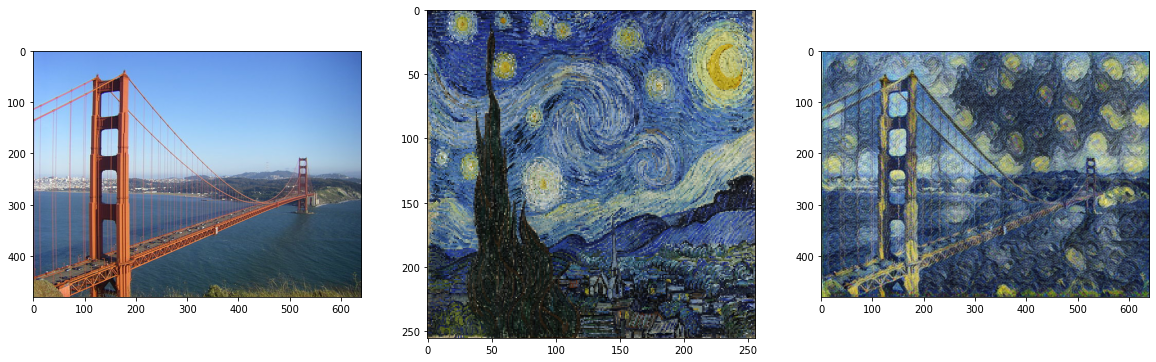

In [167]:
f, axis = plt.subplots(1, 3, figsize=(20, 20))
axis[0].imshow(content_image[0])
axis[1].imshow(style_image[0])
axis[2].imshow(stylized_image[0])

In [120]:
stylized_image

<tf.Tensor: id=24767, shape=(1, 360, 480, 3), dtype=float32, numpy=
array([[[[0.23284504, 0.40124598, 0.59723794],
         [0.1850572 , 0.28210166, 0.49959844],
         [0.50600237, 0.7040198 , 0.7926127 ],
         ...,
         [0.23760378, 0.48874953, 0.6407528 ],
         [0.34418002, 0.5767535 , 0.772234  ],
         [0.16095388, 0.32553902, 0.508825  ]],

        [[0.24560374, 0.38843238, 0.6016058 ],
         [0.19781148, 0.28485978, 0.51393294],
         [0.58984995, 0.7452082 , 0.8244434 ],
         ...,
         [0.34700483, 0.5945926 , 0.7270488 ],
         [0.47191682, 0.67739284, 0.8341599 ],
         [0.2592408 , 0.4477509 , 0.62822723]],

        [[0.20774001, 0.36617753, 0.5644117 ],
         [0.16244677, 0.27316108, 0.46648368],
         [0.58581704, 0.76272744, 0.8179724 ],
         ...,
         [0.27243632, 0.49426875, 0.6612958 ],
         [0.39652067, 0.5985287 , 0.7893785 ],
         [0.20496947, 0.3790285 , 0.55240595]],

        ...,

        [[0.47388262, 0.

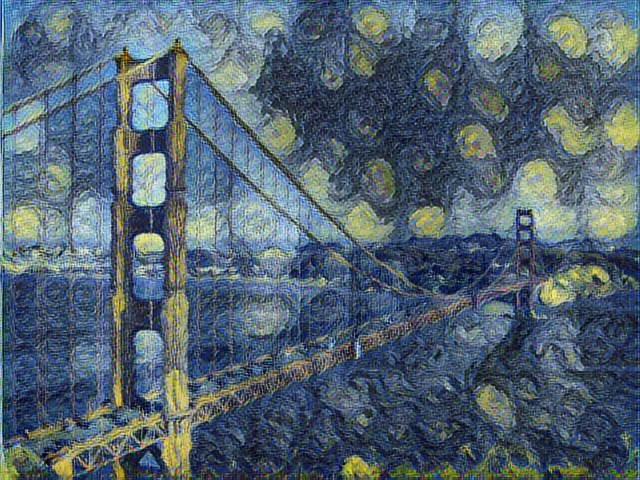

In [168]:
Image.fromarray(np.uint8(stylized_image[0] * 255))

In [146]:
stylized_image[0].dtype

tf.float32